In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import math
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
#pip install opencv-python
import cv2

labels = ['lemon', 'orange'] # lemon = 0, orange = 1
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype='object')
train = get_data(r'C:\Users\DARKO1\Certified A.I\Viki Test\final_project_dataset\train')
val = get_data(r'C:\Users\DARKO1\Certified A.I\Viki Test\final_project_dataset\test')

In [3]:
train[2:4]    #  2 pixels in train (2nd to 4th)

array([[array([[[ 56,  56,  54],
                [ 56,  56,  54],
                [ 56,  56,  54],
                ...,
                [ 49,  93,  50],
                [ 49,  94,  51],
                [ 49,  94,  51]],

               [[ 56,  56,  54],
                [ 56,  56,  54],
                [ 56,  56,  54],
                ...,
                [ 49,  93,  50],
                [ 49,  94,  51],
                [ 49,  94,  51]],

               [[ 56,  56,  54],
                [ 56,  56,  54],
                [ 56,  56,  54],
                ...,
                [ 50,  95,  52],
                [ 50,  96,  52],
                [ 50,  96,  52]],

               ...,

               [[ 15,  29,  31],
                [ 15,  29,  31],
                [ 16,  30,  31],
                ...,
                [ 97, 133,  77],
                [101, 136,  80],
                [101, 136,  80]],

               [[ 15,  29,  30],
                [ 15,  29,  30],
                [ 15,  29,  3

Setting up our image data

In [4]:
X_train = []
y_train = []


for feature, label in train:
            X_train.append(feature)
            y_train.append(label)

# empty lists for train in which we will append features and labels

In [5]:
X_val = []
y_val = []

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

# empty lists for val in which we will append features and labels

In [6]:
from sklearn.preprocessing import normalize

In [7]:
# # Normalization with linear algebra on the dataset which will not be used
# train = np.random.rand(1000)*10
# train_norm = train / np.linalg.norm(train)  # normalization on train
# #print(train_norm)

# val = np.random.rand(1000)*10
# val_norm = val / np.linalg.norm(val)  # normalization on val
# print(val_norm.shape)

In [8]:
# raw normalization (0,255) from black to white
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255

#X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

#X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


#print(X_val)
# print(y_val)
# y_train.shape

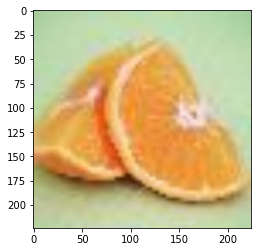

In [9]:
plt.imshow(X_train[666], cmap = 'hot') #a random item from train, visualised. Not a Lemon

In [10]:
#print(X_val)
labels[1]

'orange'

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

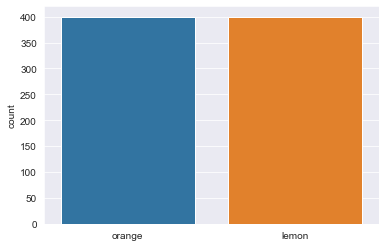

In [11]:
l = []

for i in train:
    if(i[1] == 0):
        l.append('orange')
    else:
        l.append('lemon')
        # filling an empty list with the train data

sb.set_style('darkgrid')
sb.countplot(l)  # visualisation on the empty list



In [12]:
model = Sequential()
model.add(Conv2D(32,3, padding = 'same', activation = 'relu' , input_shape =(224,224,3)))      # model dimensions, height , widght, colors (RGB)
model.add(MaxPool2D())

model.add(Conv2D(32,3, padding = 'same', activation = 'relu'))                                 # ReLU because we need a positive outcome
model.add(MaxPool2D())

model.add(Conv2D(64,3, padding = 'same', activation = 'relu'))                                 # 3 Conv2D layers
model.add(MaxPool2D())
model.add(Dropout(0.5))                                                                        # dropout layer to avoid overfit

model.add(Flatten())                                                                           # flatten the matrix in to 1D
model.add(Dense(128, activation = 'relu'))                                                      
model.add(Dense(2, activation = 'softmax'))                                                     # using softmax because we need the "biggest" value

model.summary()                                                                                # detailed summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [13]:
adam = Adam(learning_rate=0.00001) # lower learning rate for smoother curve

def model_adam():
    model.compile(optimizer = adam,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])    
    
# creating a training model using adam, SparseCategoricalCrossentropy with implemented loss model
# from_logits=False because we've made the normalization beforehand

model_adam()
history = model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 10)   # giving the model 10 epochs to train

# train the data


Epoch 1/10
25/25 [==============================] - 22s 816ms/step - loss: 0.6734 - accuracy: 0.6112 - val_loss: 0.6473 - val_accuracy: 0.7000
Epoch 2/10
25/25 [==============================] - 20s 796ms/step - loss: 0.6239 - accuracy: 0.7113 - val_loss: 0.6030 - val_accuracy: 0.6800
Epoch 3/10
25/25 [==============================] - 20s 806ms/step - loss: 0.5699 - accuracy: 0.7538 - val_loss: 0.5469 - val_accuracy: 0.7400
Epoch 4/10
25/25 [==============================] - 21s 828ms/step - loss: 0.5180 - accuracy: 0.7812 - val_loss: 0.5177 - val_accuracy: 0.7300
Epoch 5/10
25/25 [==============================] - 22s 895ms/step - loss: 0.4812 - accuracy: 0.8012 - val_loss: 0.4756 - val_accuracy: 0.8050
Epoch 6/10
25/25 [==============================] - 20s 790ms/step - loss: 0.4518 - accuracy: 0.8175 - val_loss: 0.4635 - val_accuracy: 0.7850
Epoch 7/10
25/25 [==============================] - 19s 762ms/step - loss: 0.4305 - accuracy: 0.8238 - val_loss: 0.4447 - val_accuracy: 0.8250

In [20]:
# evaluationing the model
acc = history.history['accuracy']
validation = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

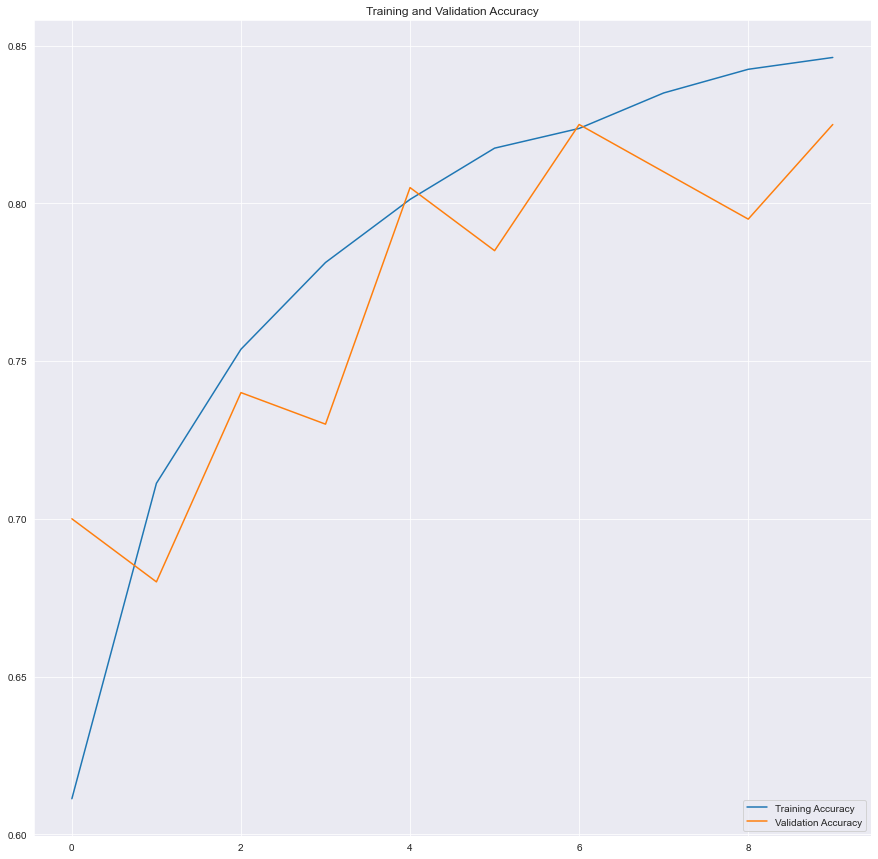

In [15]:
epoch_range = range(10) # 10 because we have 10 epochs
"""Accuracy on train and Validation"""
plt.figure(figsize=(15,15))
plt.plot(epoch_range, acc, label = 'Training Accuracy')
plt.plot(epoch_range, validation, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")  

Text(0.5, 1.0, 'Training and Validation Loss')

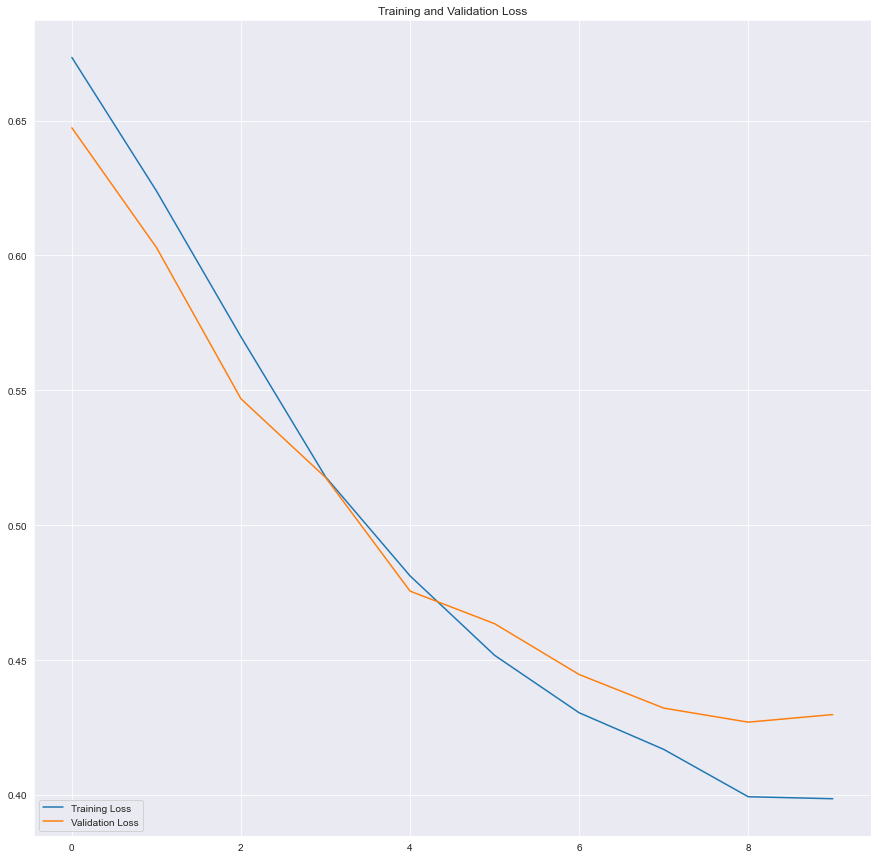

In [16]:
"""Accuracy on Train and Validation Loss"""
plt.figure(figsize=(15,15))
plt.plot(epoch_range, loss, label = 'Training Loss')
plt.plot(epoch_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower left')
plt.title("Training and Validation Loss")

In [17]:
from sklearn.metrics import classification_report


prediction = model.predict(X_val)
prediction = np.argmax(np.round(prediction), axis = 1)                  # max value from the target function (prediction)
#prediction = prediction.reshape(-1, 1)[0]
print(classification_report(y_val, prediction, target_names = labels))  # classification_report on the validation set

              precision    recall  f1-score   support

       lemon       0.89      0.74      0.81       100
      orange       0.78      0.91      0.84       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [21]:
from sklearn.metrics import confusion_matrix
"""confusion matrix"""
tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy: {:0.2f}%".format(Accuracy))

True Negatives:  74
False Positives:  26
False Negatives:  9
True Positives:  91
Accuracy: 82.50%
